<a href="https://colab.research.google.com/github/kiplangat-david/DS-CORE-IP-PROJECTS/blob/main/strip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
%matplotlib inline

In [24]:
data = pd.read_csv('Traffic_Collision_Data.csv')
 
 #preview top 5 records
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [5]:
#shape
data.shape

(88093, 18)

In [7]:
#cleaning

#missing values
data.isnull().sum() #prints columns with corresponding number of missing values


DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  11079
Victim Age                 6393
Victim Sex                 1976
Victim Descent             2154
Premise Code                911
Premise Description         912
Address                       0
Cross Street               5741
Location                      1
dtype: int64

In [8]:
#check proportion of missing values
round(data.isnull().sum()/len(data),2) #divides missing values with total length of data and gives output correct to 2 decimal places

DR Number                 0.00
Date Reported             0.00
Date Occurred             0.00
Time Occurred             0.00
Area ID                   0.00
Area Name                 0.00
Reporting District        0.00
Crime Code                0.00
Crime Code Description    0.00
MO Codes                  0.13
Victim Age                0.07
Victim Sex                0.02
Victim Descent            0.02
Premise Code              0.01
Premise Description       0.01
Address                   0.00
Cross Street              0.07
Location                  0.00
dtype: float64

In [9]:
#proportion is less than 1% and so we will drop them
data.dropna(inplace=True)

In [10]:
#Duplicates
data.duplicated().sum()

0

In [25]:
#Clean and format column names
data.columns = (data.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [26]:
data.head()

,DR_NUMBER,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,AREA_ID,AREA_NAME,REPORTING_DISTRICT,CRIME_CODE,CRIME_CODE_DESCRIPTION,MO_CODES,VICTIM_AGE,VICTIM_SEX,VICTIM_DESCENT,PREMISE_CODE,PREMISE_DESCRIPTION,ADDRESS,CROSS_STREET,LOCATION
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [27]:
#data types
data.dtypes

DR_NUMBER                   int64
DATE_REPORTED              object
DATE_OCCURRED              object
TIME_OCCURRED               int64
AREA_ID                     int64
AREA_NAME                  object
REPORTING_DISTRICT          int64
CRIME_CODE                  int64
CRIME_CODE_DESCRIPTION     object
MO_CODES                   object
VICTIM_AGE                float64
VICTIM_SEX                 object
VICTIM_DESCENT             object
PREMISE_CODE              float64
PREMISE_DESCRIPTION        object
ADDRESS                    object
CROSS_STREET               object
LOCATION                   object
dtype: object

In [28]:
data['DATE_REPORTED'] = pd.to_datetime(data['DATE_REPORTED'])
data['DATE_OCCURRED'] = pd.to_datetime(data['DATE_OCCURRED'])
data['TIME_OCCURRED'] = pd.to_datetime(data['TIME_OCCURRED'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Outliers of different victime ages')

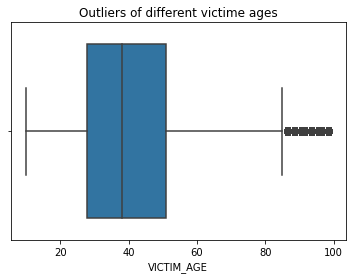

In [29]:
#outliers
#victim age
sns.boxplot(data['VICTIM_AGE'])
plt.title('Outliers of different victime ages')